In [12]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from tqdm import tqdm
import matplotlib as mpl
from scipy.stats import binned_statistic_2d
from numba import njit
import h5py as h5
import os

In [13]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [14]:
name = 'MW4_MHG0.25_GSE6'
nameiso = 'MW4iso_fg0.2_MHG0.25_RC9'

In [15]:
def bin_sfr(t, sfr, bin_width=0.01):
    bin_left = 0.0
    bin_right = bin_left + bin_width
    
    ave_sfr = []
    ave_t = []
    
    max_val = np.max(t)
    while bin_left < max_val:
        key = np.logical_and(t >=bin_left, t<bin_right)
        ave_sfr.append(np.mean(sfr[key]))
        ave_t.append(np.mean(t[key]))
        
        bin_left += bin_width
        bin_right += bin_width
        
    return np.array(ave_t), np.array(ave_sfr)
    

In [16]:
sfr = np.genfromtxt(basepath + '/runs/'+name+'/lvl4/output/sfr.txt')
sfriso = np.genfromtxt(basepath + '/runs/'+nameiso+'/lvl4/output/sfr.txt')
t, sfr = bin_sfr(sfr[:,0], sfr[:,2])
tiso, sfriso = bin_sfr(sfriso[:,0], sfriso[:,2])

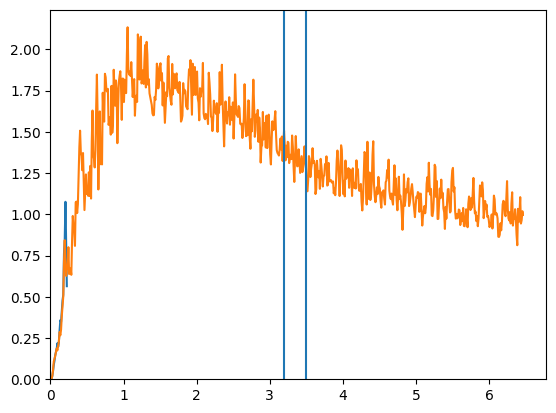

In [17]:
plt.plot(t, sfr)
plt.plot(tiso, sfriso)
plt.xlim(0, None)
plt.ylim(0, None)

plt.axvline(3.2)
plt.axvline(3.5)

In [18]:
print(3.2/0.005)
print(3.5/0.005)

640.0
700.0


In [19]:
sn = {}
sn[640] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4/output', 640, combineFiles=True)
sn[700] = arepo.Snapshot(basepath + 'runs/' + name + '/lvl4/output', 700, combineFiles=True)

In [20]:
COM = np.load(basepath + 'anlys/COM/COM_' + name + '-lvl4.npy', allow_pickle=True).item()

In [21]:
r = {}
r[640] = np.linalg.norm(sn[640].part0.pos.value - COM['MW_COM'][640], axis=1)
r[700] = np.linalg.norm(sn[700].part0.pos.value - COM['MW_COM'][700], axis=1)

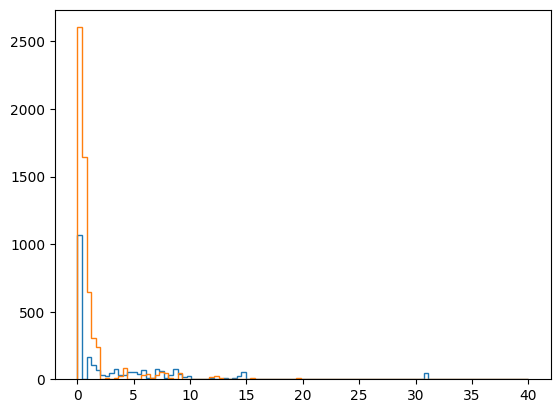

In [22]:
plt.hist(r[640][sn[640].sfr.value > 0], bins=np.linspace(0, 40, 100), histtype='step');
plt.hist(r[700][sn[700].sfr.value > 0], bins=np.linspace(0, 40, 100), histtype='step');

Text(0, 0.5, 'SFR [Msun/yr]')

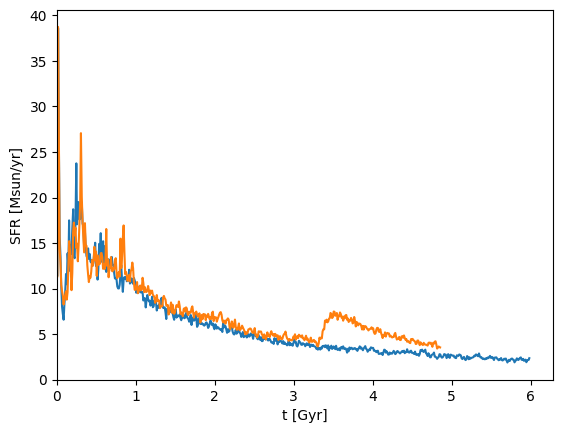

In [23]:
name = 'MW3_MHG0.25_GSE6'
nameiso = 'MW3iso_fg0.7_MHG0.25_RC9'

sfr = np.genfromtxt(basepath + '/runs/'+name+'/lvl4/output/sfr.txt')
sfriso = np.genfromtxt(basepath + '/runs/'+nameiso+'/lvl4/output/sfr.txt')
t, sfr = bin_sfr(sfr[:,0], sfr[:,2])
tiso, sfriso = bin_sfr(sfriso[:,0], sfriso[:,2])

plt.plot(tiso, sfriso, label='isolated')
plt.plot(t, sfr, label='merger')
plt.xlim(0, None)
plt.ylim(0, None)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')

# plt.axvline(3.2)
# plt.axvline(3.5)

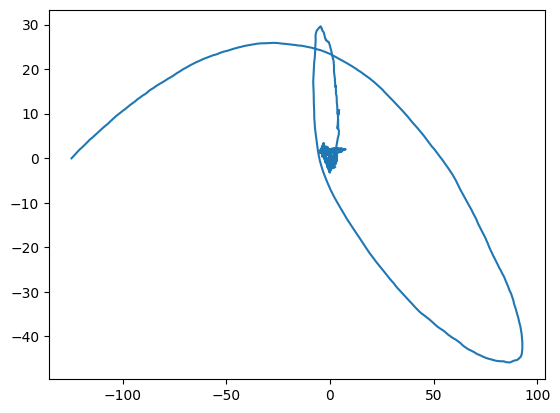

In [24]:
orbit = COM['GSE_COM'] - COM['MW_COM']
plt.plot(orbit[:,0], orbit[:,1])

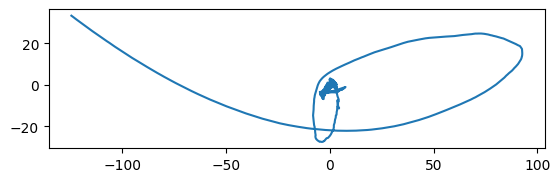

In [25]:
plt.plot(orbit[:,0], orbit[:,2])
plt.gca().set_aspect(1)